HW 1 \
source: https://shangjingbo1226.github.io/teaching/2022-winter-DSC190-DM

Download nutrition facts for McDonalds https://www.kaggle.com/mcdonalds/nutrition-facts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mcdonald_menu = pd.read_csv("menu.csv")
mcdonald_menu.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


<Axes: xlabel='Calories', ylabel='Count'>

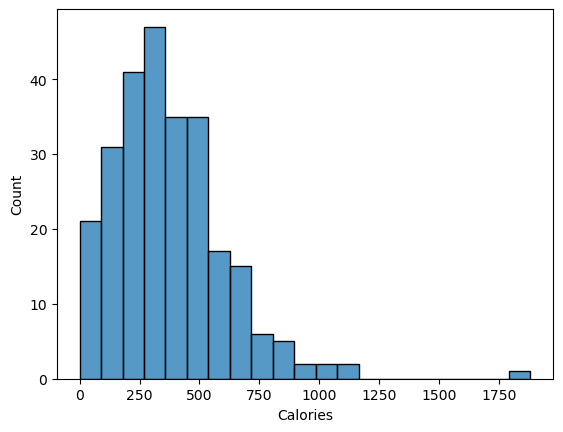

In [3]:
sns.histplot(mcdonald_menu['Calories'])

`Calories` is numeric data type and since it has an absolute zero, it is a quantitative data type that is ratio-scaled, meaning we can operate multiplication and division on it.

True
False


<Axes: >

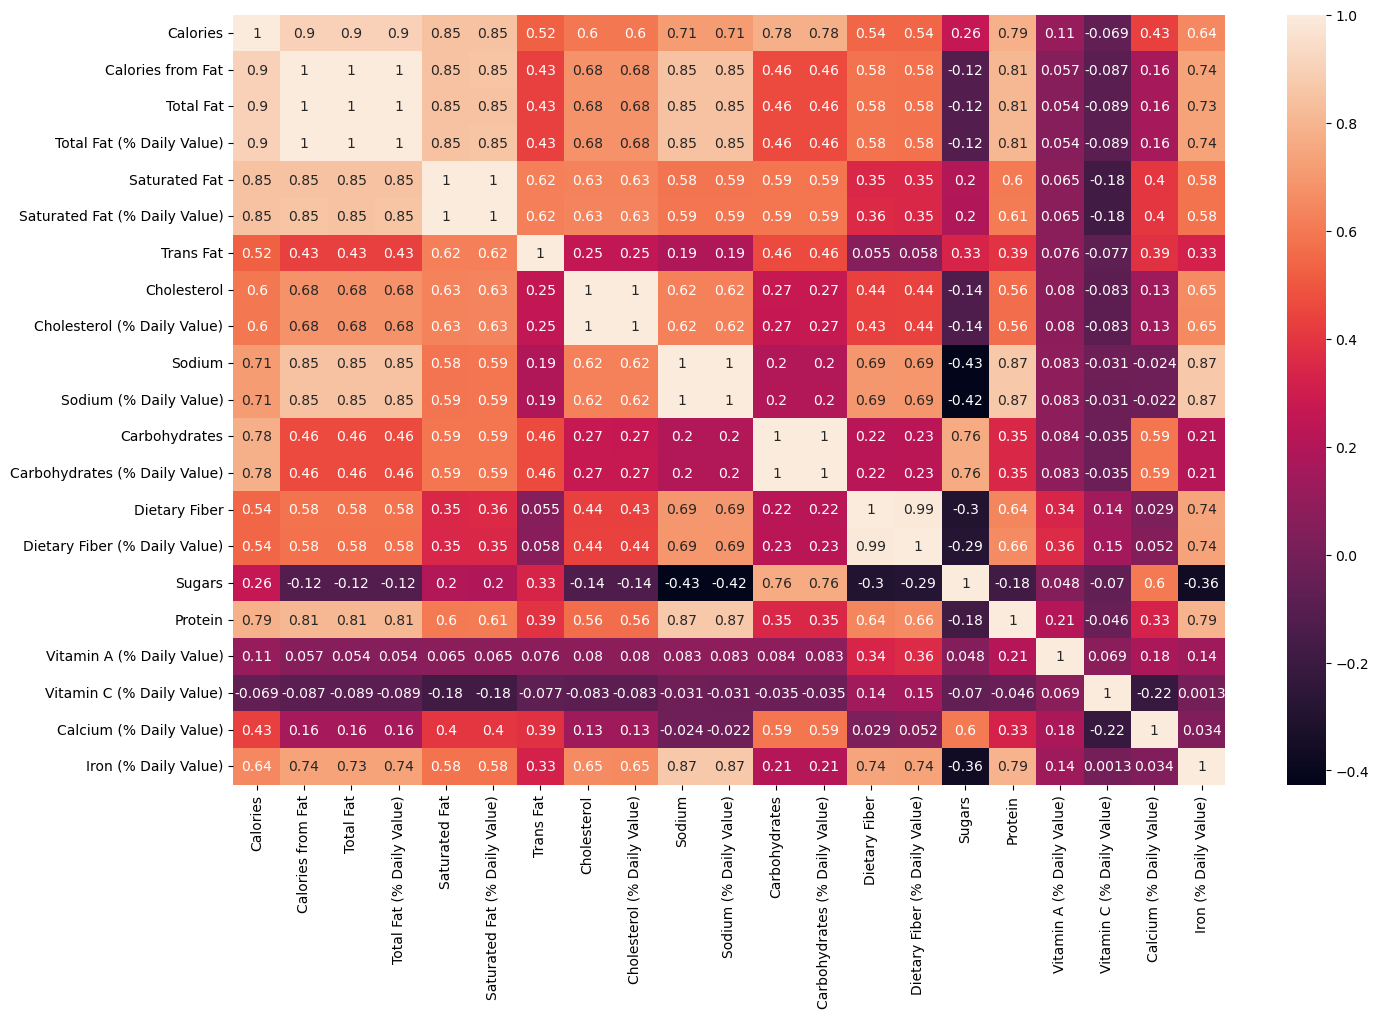

In [16]:
def haveOnlyNumericData(df, columns):
    if df.applymap(lambda x: isinstance(x, (int, float))).all().all():
        return True
    else:
        return False
        

mcdonald_numeric = mcdonald_menu.iloc[:,3:]
columns = mcdonald_numeric.columns
print(haveOnlyNumericData(mcdonald_numeric, columns))
print(haveOnlyNumericData(mcdonald_menu, mcdonald_menu.columns))
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(mcdonald_numeric.corr(), annot=True)

The diagonal elements are always one because there is a one-to-one correlation to the identical variable. According to the heatmap, the `Calories from Fat`, `Saturated Fat`, and `Carboyhydrates` have correlation of 0.9, 0.85, and 0.78, respectively, to `Calories`. Then, we can deduce that `Calories from Fat` and `Saturdated Fat` have the second and third largest correlation with `Calories`. Remarkably, `Vitamin C (% Daily Value)` is the only feature with negative correlation with `Calories`. This is expected because typically fruits are foods with high Vitamin C, and since McDonald menu typically does not contain fruit, then this negative correlation is plausible.

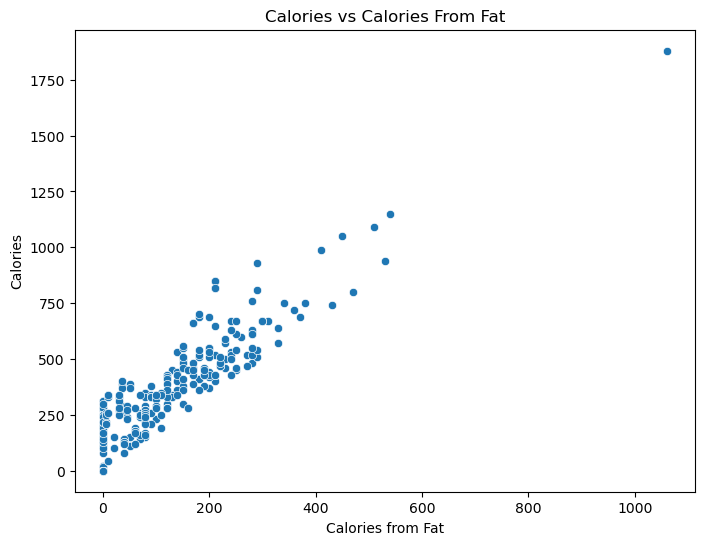

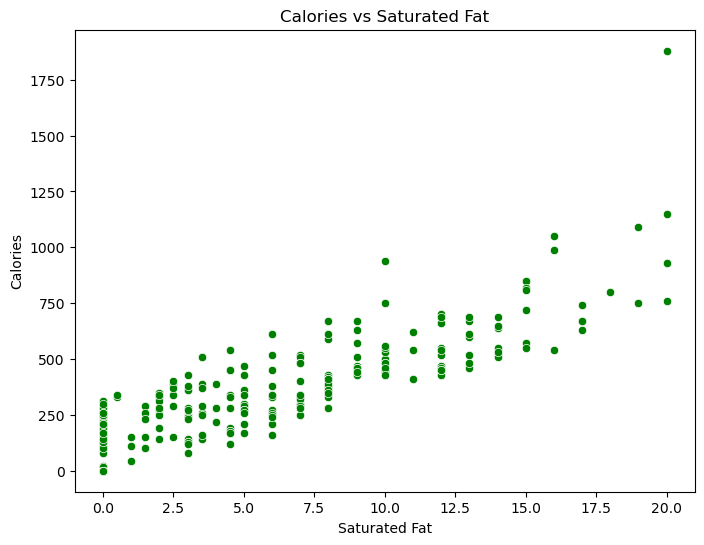

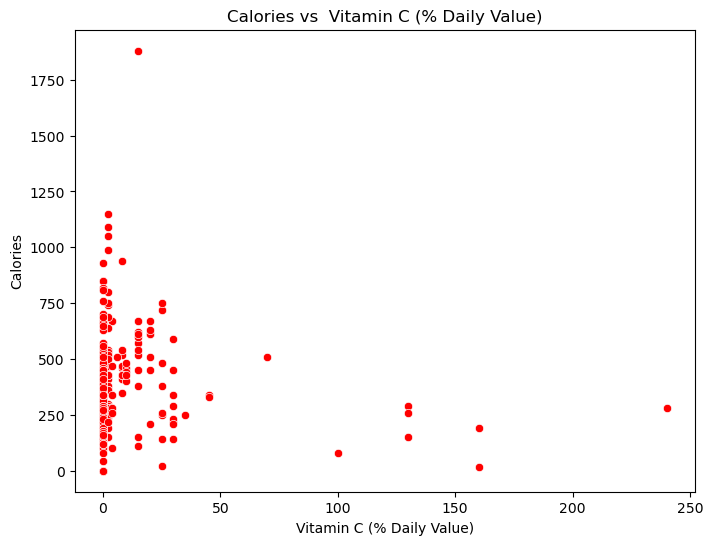

In [20]:
features_with_positive_corr = [mcdonald_menu.columns[4], mcdonald_menu.columns[7]]
features_with_negative_corr = [mcdonald_menu.columns[-3]]
plt.rcParams['figure.figsize'] = (8,6)


sns.scatterplot(data=mcdonald_menu, x='Calories from Fat', y='Calories')
plt.title('Calories vs Calories From Fat')
plt.show()

sns.scatterplot(data=mcdonald_menu, x='Saturated Fat', y='Calories', color='green')
plt.title('Calories vs Saturated Fat')
plt.show()

sns.scatterplot(data=mcdonald_menu, x='Vitamin C (% Daily Value)', y='Calories', color='red')
plt.title('Calories vs  Vitamin C (% Daily Value)')
plt.show()


